# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [6]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [9]:
df['admit'].count()

400

Answer: 400

> ### Question 2.  Create a summary table.

In [11]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [13]:
# TODO
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: I think knowledge, skills, educational setting, test taking skills, economic, and social systems could influence GRE scores more than GPA. Meanwhile, the overall range in GRE is simply greater than GPA, which opens up the possiblity for the variance to be greater than GPA.

> ### Question 4.  Drop data points with missing data.

In [19]:
# TODO
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [20]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [30]:
df2 = df.dropna(thresh=4)
df2

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [31]:
# TODO
df2.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [32]:
df2.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: I dropped the row entirely if there was an NaN. I can tell that I dropped it correctly because I can see there are 397 observations for each variable.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

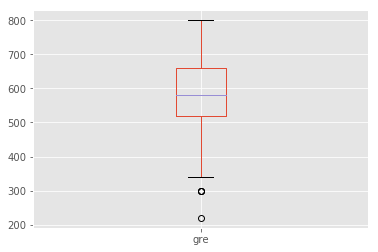

In [33]:
# TODO
df[ ['gre'] ].plot(kind = 'box')

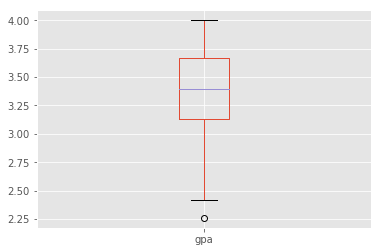

In [34]:
# TODO
df[ ['gpa'] ].plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: Boxplots show the range, median, first quartile, and third quartile of a data set.

> ### Question 8.  Plot the distribution of each variable.

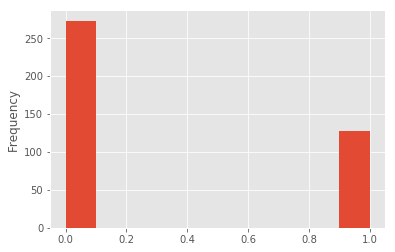

In [40]:
# TODO
df.admit.plot(kind = 'hist')

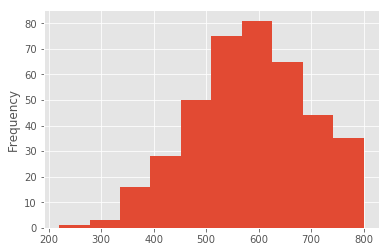

In [41]:
# TODO
df.gre.plot(kind = 'hist')

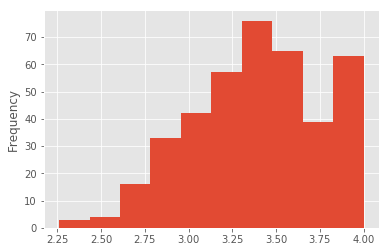

In [43]:
# TODO
df.gpa.plot(kind = 'hist')

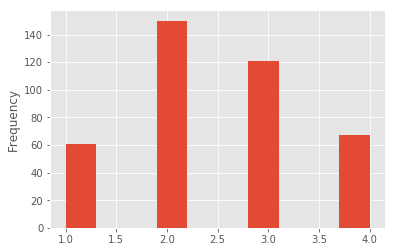

In [44]:
# TODO
df.prestige.plot(kind = 'hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [55]:
# TODO
df.gre.mean()

588.0402010050251

In [49]:
# TODO
df.gre.median()

580.0

In [50]:
df.gre.mode()

0    620.0
dtype: float64

In [53]:
df.gpa.mean()

3.3909296482412077

In [52]:
df.gpa.median()

3.395

In [51]:
df.gpa.mode()

0    4.0
dtype: float64

Answer: No, we would not meet the requirement of a standard normal distribution because by defintiion the mean, median, and mode of the variable in question must equal. I don't think the distribution would need correction if it's "close enough" to a normal distribution. You could help correct the distribution by removing the outliers as shown in the box plots to make it more "normal."

> ### Question 10.  Create a correlation matrix for the dataset.

In [56]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Prestige is has the highest correlation with admit (negative correlation). GRE has just a tiny bit more correlation to admit than gpa. None of the variables look potentially colinear because the predictor variables aren't highly correlated to each other (between -0.5 and 0.5).

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:
Using UCLA dataset student data, determine the various factors that may influence admission into graduate school (Graduate Record Examination Score, Grade Point Average Score, etc).

1. Partition data for training set and test set.
2. Test the cofficients to see if they are significant.
3. Check the model's fit and whether or not it is fit.
4. Check how well training model works against test set.

> ### Question 13.  What is your hypothesis?

Answer: Gpa and gre are better predictors for admit in terms of postive correlation; however, with prestige having the strongest (negative) correlation, it seems as though a high prestige score lowers chances of admission.